# Titanic: Machine Learning from Disaster

ひとまずmeetup15のkaggle-animal.ipynbの作業手順を参考に機械学習させてみる

# ４つの基本ステップ

1. 準備（データを落として来たり、ライブラリを読み込んだりする）
2. データ整形（予測に効きそうな特徴量をうまくデザインしながら、全ての情報を数値データに変換する）
3. 機械学習（交差検定を駆使してモデルごとに程よいハイパーパラメータを選び、最後にアンサンブル学習）
4. 結果提出（予測結果をCSVファイルに書き出して、kaggleに提出）

# ステップ１：準備

目的：データを用意し、ライブラリを読み込む

In [1]:
import numpy as np  
import pandas as pd  

# 基本の描画ライブラリ（２つ）
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 便利な設定

# pandasで全ての列を表示
pd.options.display.max_columns = None

# 図をipython notebook内で表示
%matplotlib inline

# DeplicatedWarningを避けるため
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

# ステップ２：データ整形

目的：データの特徴を理解し、機械学習ができる形に整形する

## データの読み込み

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

## データを眺める

### kaggleからとってきたデータの詳細情報

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()
# trainデータは全部で891人分の学習データがある

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.info()
# testデータは全部で418人分

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_train_NaNCnt_dict = {}

In [8]:
df_train_NaNCnt_dict["Age"] = df_train["Age"].isnull().sum()
df_train_NaNCnt_dict["Cabin"] = df_train["Cabin"].isnull().sum()
df_train_NaNCnt_dict["Embarked"] = df_train["Embarked"].isnull().sum()
# NaN値がいくつあるのか知りたい

In [9]:
df_train_NaNCnt_dict

{'Age': 177, 'Cabin': 687, 'Embarked': 2}

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe(include='all')
# Survivedが最終的に予測するデータだということがわかる

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Denbury, Mr. Herbert",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [12]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 予測１：Pclass（社会的経済的な地位）の高い人ほどたくさんの人が生き残ってるのではないか

In [14]:
df_train.groupby('Pclass')['Survived'].sum()
# うーん、一概にそうとは言えなさそう

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [15]:
# 男性か女性のどちらかが多く生き残ったのか気になったから見てみる
df_train.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [16]:
df_train['Sex'].value_counts()
# 男と女の数を集計するときなどは、value_counts()を用いる

male      577
female    314
Name: Sex, dtype: int64

# うーん。わからん！

ここで中西プライドを捨てmeetup01の資料をカンニング

データを貰ったら、まずは独立変数（説明変数）と従属変数（目的変数）を考えよう

## 独立変数（説明変数）

- PassengerId: 乗客ID
- Pclass: 客室の等級（1st, 2nd , 3rd）
- Name: 名前
- Sex: 性別
- Age: 年齢
- SibSp: 共に乗船していた兄弟（siblings）や 配偶者（spouses）の数
- Parch: 共に乗船していた親（parents）や子供（children）の数
- Ticket: チケットのタイプ
- Fare: チケットの料金
- Cabin: 客室番号
- Embarked: 乗船港（**Q**ueenstown, **C**herbourg, **S**outhampton）

## 従属変数（目的変数）
- Survived：生存者かどうか（1: 助かった、0：助からなかった）

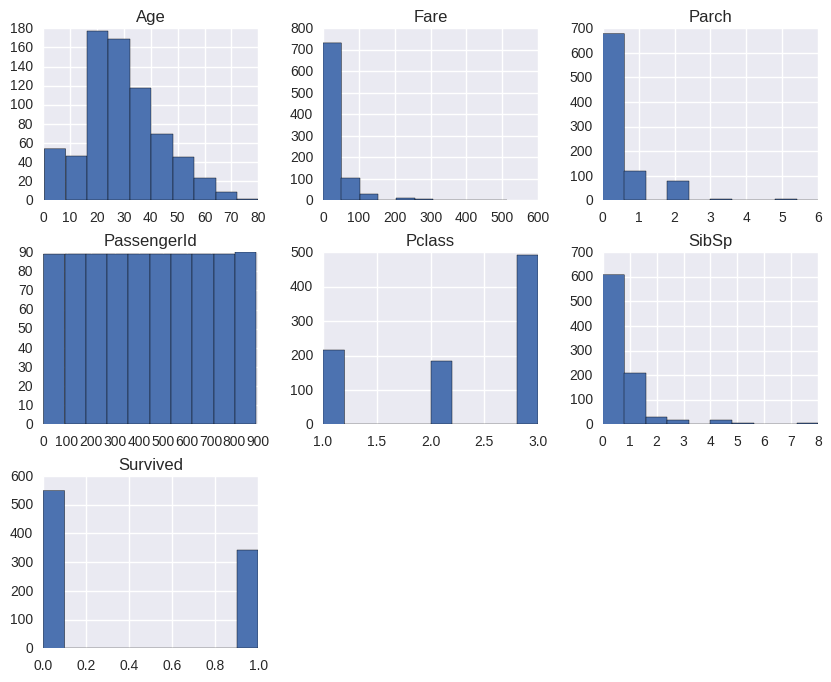

In [17]:
# 真似してグラフを出してみる
df_train.hist(figsize=(10, 8));
# df_train.hist();

# このnotebookの一番最初の方でやりたかった、性別のデータのみを使ったモデル作成をしてみる

In [26]:
pt = df_train.pivot_table(values='PassengerId', 
                          index='Sex',              # 縦軸
                          columns='Survived',       # 横軸
                          aggfunc=lambda x: len(x)) # aggfuncはdefaultでnumpy.meanを使って算術平均をした値を返す
                                                    # 別の処理をしてほしいときはlambda式で処理の内容を渡してあげる
pt
# pivot_tableを作成して表示

Survived,0,1
Sex,,
female,81,233
male,468,109


うん。まずlambdaがわからん←  
わかった！ (http://emoson.hateblo.jp/entry/2014/10/14/022053)

In [19]:
pt2 = pt.apply(lambda x: x/sum(x), axis=1)
pt2

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


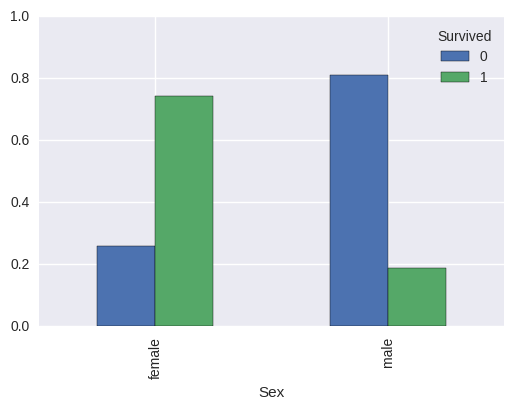

In [20]:
pt2.plot(kind="bar", ylim=(0, 1))

In [21]:
# モデルを用いてテストデータの目的変数を予測する
df_test['Survived'] = df_test['Sex'].map( {'female': 1, 'male': 0}).astype(int)

In [22]:
# df_testがどうなってるのかちょっと確認
# (http://pythondatascience.plavox.info/pandas/%E8%A1%8C%E3%83%BB%E5%88%97%E3%81%AE%E6%8A%BD%E5%87%BA/)
df_test.loc[:,['Sex','Survived']].head(10)

,Sex,Survived
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1
5,male,0
6,female,1
7,male,0
8,female,1
9,male,0


### どういう形のデータを出せばいいのか迷ったら、kaggleから落としてきた以下の２つのファイルを見てみる

- gendermodel.csv
- genderclassmodel.csv

### 最初の考えでは、どうやって性別のデータだけで機械学習させたらいいのか迷ってたけど、今回のシンプルな予測モデルなら、手入力でSurvivedのカラムをdf_testに追加してモデル完成！


In [23]:
# モデルデータ(csvファイル)のエクスポート
df_test[['PassengerId', 'Survived']].to_csv("output/submission01.csv", index=False)

## ひとまずアップロード！！！！

![title](img/Submission01_rank.png)

# 4439位！！！！！

### この後、SexとPassenger Classのデータをもとに機械学習させようと思ったがどのアルゴリズムにどのようにデータを食わせていいのか全然わからなくなった。。。

### そこで、Kaggleのタイタニックのページに乗ってたトレーニングをやってみることに

- Kaggle Python Tutorial on Machine Learning  
    https://www.datacamp.com/community/open-courses/kaggle-python-tutorial-on-machine-learning

しかし最近英文が結構読めるようになってきたので、海外のわかりやすいトレーニングを利用できるのはかなり学習スピード早いなーとしみじみ感じた

## ほうほう。ひとまずDecision treeを使って機械学習させるようです

### 俺も真似してやってみることに

- scikit-learn にて決定木による分類が実装されているクラス、 tree.DecisionTreeClassifier クラスの fit メソッドに、説明変数と目的変数の両方を与え、モデル (=決定木) を作成します。今回は木の深さの最大値として、max_depth=3 を指定しています。(http://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%A7%E6%B1%BA%E5%AE%9A%E6%9C%A8%E5%88%86%E6%9E%90/)

### ほうほう。fitメソッドで説明変数と目的変数をあたえてるのか

### どのアルゴリズムを用いて学習させるかも大切だが、なぜ生き残ったのか、アイデアを考えることが大切ｂ

---

# DecisionTreeを使ってのClassifierに挑戦s！→workspace02.ipynbに続く